In [1]:
import pandas as pd

# Load the dataset
file_path = 'Data/training_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,clarity_id,metric,metric_year,provider_code,clarity_industry_code,clarity_industry_name,country_code,co2directscope1_raw,revenue,co2directscope1_intensity,verification_co2directscope1,targets_emissions,policy_emissions,sbti_alignment,nz_statement
0,01FF543RN5MZWC981FMFGMM6E4,CO2DIRECTSCOPE1,2017,TRC8,25301040/0,Restaurants,GB,9.412684e+05,7.648087e+04,12.307239,NaN,100.0,100.0,100.0,100.0
1,01FF543SRJYTXND0M7XQC1TP4J,CO2DIRECTSCOPE1,2005,TRC8,25102010/0,Automobile Manufacturers,KR,4.651728e+07,1.924310e+06,24.173485,NaN,100.0,100.0,NaN,100.0
2,01FF543VB1A9CJMHM3ECG1RB6Z,CO2DIRECTSCOPE1,2014,TRC1,15104040/0,Precious Metals & Minerals,BM,5.525173e+06,5.898997e+04,93.662921,NaN,100.0,100.0,NaN,1.0
3,01FF543T095C9344VSA8AX6M7X,CO2DIRECTSCOPE1,2017,TRC8,35101020/0,Health Care Supplies,JP,2.686057e+06,5.538943e+05,4.849404,NaN,100.0,100.0,NaN,1.0
4,01FF543WBGY98G1H88BVQG93P0,CO2DIRECTSCOPE1,2008,TRC1,15101050/0,Specialty Chemicals,US,3.916745e+08,8.528900e+05,459.232117,NaN,100.0,100.0,NaN,1.0


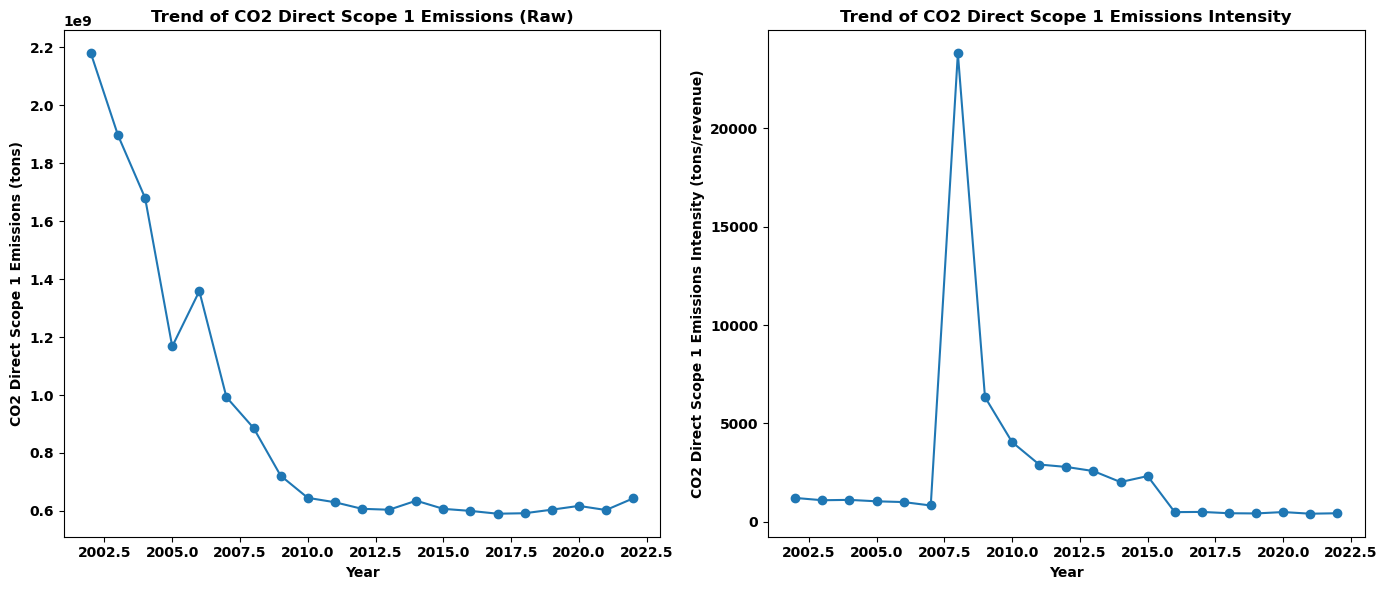

In [2]:
import matplotlib.pyplot as plt

# Extracting relevant columns for plotting
data_subset = data[['metric_year', 'co2directscope1_raw', 'co2directscope1_intensity']]

# Aggregating data by year
data_agg = data_subset.groupby('metric_year').mean().reset_index()

# Plotting co2directscope1_raw
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(data_agg['metric_year'], data_agg['co2directscope1_raw'], marker='o', linestyle='-')
plt.title('Trend of CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('Year')
plt.ylabel('CO2 Direct Scope 1 Emissions (tons)')

# Plotting co2directscope1_intensity
plt.subplot(1, 2, 2)
plt.plot(data_agg['metric_year'], data_agg['co2directscope1_intensity'], marker='o', linestyle='-')
plt.title('Trend of CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('Year')
plt.ylabel('CO2 Direct Scope 1 Emissions Intensity (tons/revenue)')

plt.tight_layout()
plt.show()


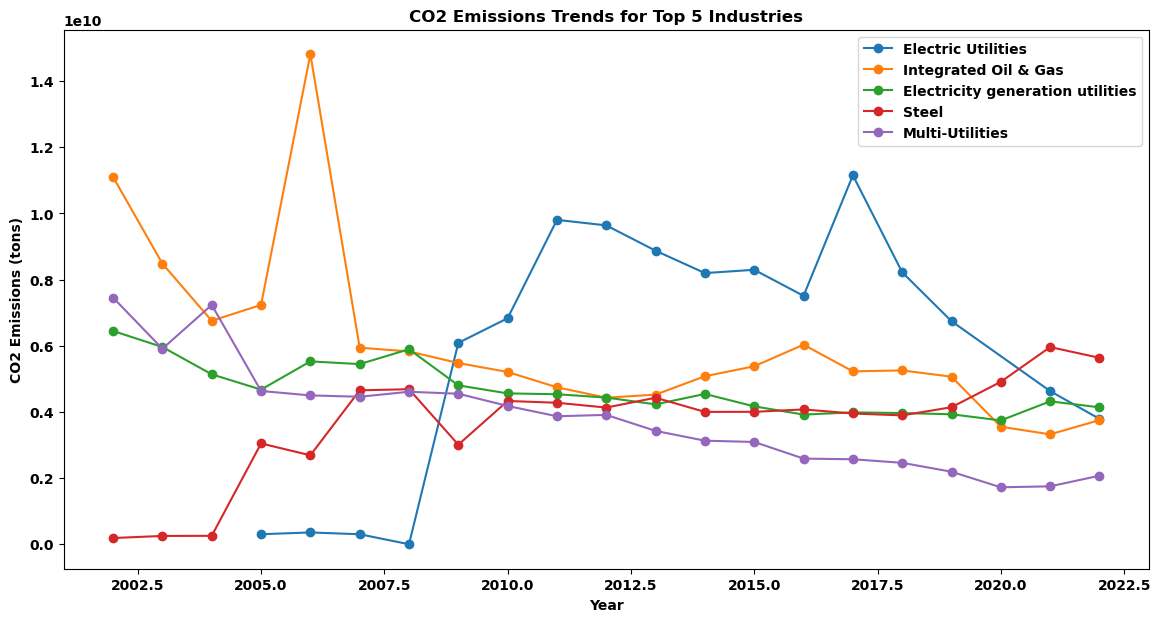

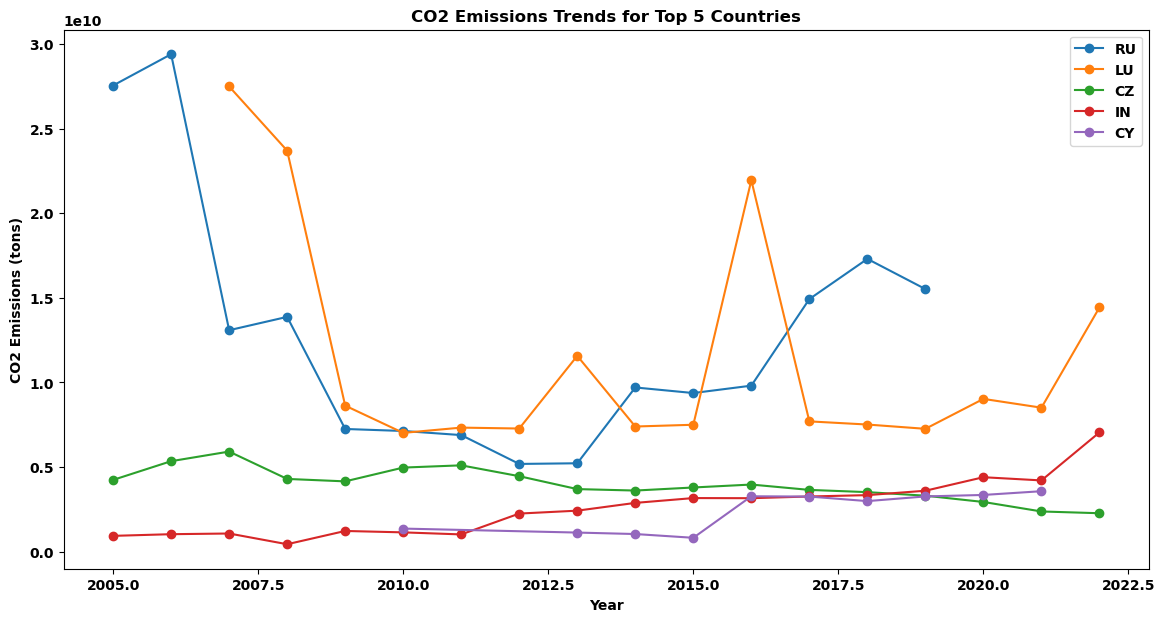

In [3]:

# Aggregate CO2 emissions by industry
industry_emissions = data.groupby('clarity_industry_name')['co2directscope1_raw'].mean().reset_index()

# Sort by emissions in descending order
industry_emissions = industry_emissions.sort_values(by='co2directscope1_raw', ascending=False)

# Aggregate CO2 emissions by country
country_emissions = data.groupby('country_code')['co2directscope1_raw'].mean().reset_index()

# Sort by emissions in descending order
country_emissions = country_emissions.sort_values(by='co2directscope1_raw', ascending=False)

# Identify the top 5 countries and industries by total CO2 emissions

# Top 5 industries
top_5_industries = industry_emissions.head(5)['clarity_industry_name'].tolist()

# Top 5 countries
top_5_countries = country_emissions.head(5)['country_code'].tolist()

# Filter data for top 5 industries
industry_data = data[data['clarity_industry_name'].isin(top_5_industries)]

# Plotting industry trends
plt.figure(figsize=(14, 7))
for industry in top_5_industries:
    industry_trend = industry_data[industry_data['clarity_industry_name'] == industry]
    industry_trend = industry_trend.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
    plt.plot(industry_trend['metric_year'], industry_trend['co2directscope1_raw'], marker='o', label=industry)

plt.title('CO2 Emissions Trends for Top 5 Industries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()
plt.show()

# Filter data for top 5 countries
country_data = data[data['country_code'].isin(top_5_countries)]

# Plotting country trends
plt.figure(figsize=(14, 7))
for country in top_5_countries:
    country_trend = country_data[country_data['country_code'] == country]
    country_trend = country_trend.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
    plt.plot(country_trend['metric_year'], country_trend['co2directscope1_raw'], marker='o', label=country)

plt.title('CO2 Emissions Trends for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()
plt.show()

### CO2 Emissions Trends for Top 5 Industries
- Electricity generation utilities
- Integrated Oil & Gas
- Multi-Utilities
- Steel
- Cement Producers

### CO2 Emissions Trends for Top 5 Countries
- United States (US)
- Japan (JP)
- Germany (DE)
- France (FR)
- India (IN)


In [5]:
outlier_threshold = 3

# Removing Outliers by STD

C:\Users\Marshall\AppData\Local\Temp\ipykernel_10280\2698430170.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_company_raw_std = data.groupby('clarity_id').apply(lambda x: find_outliers_std(x, 'co2directscope1_raw')).reset_index(drop=True)
C:\Users\Marshall\AppData\Local\Temp\ipykernel_10280\2698430170.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_company_intensity_std =

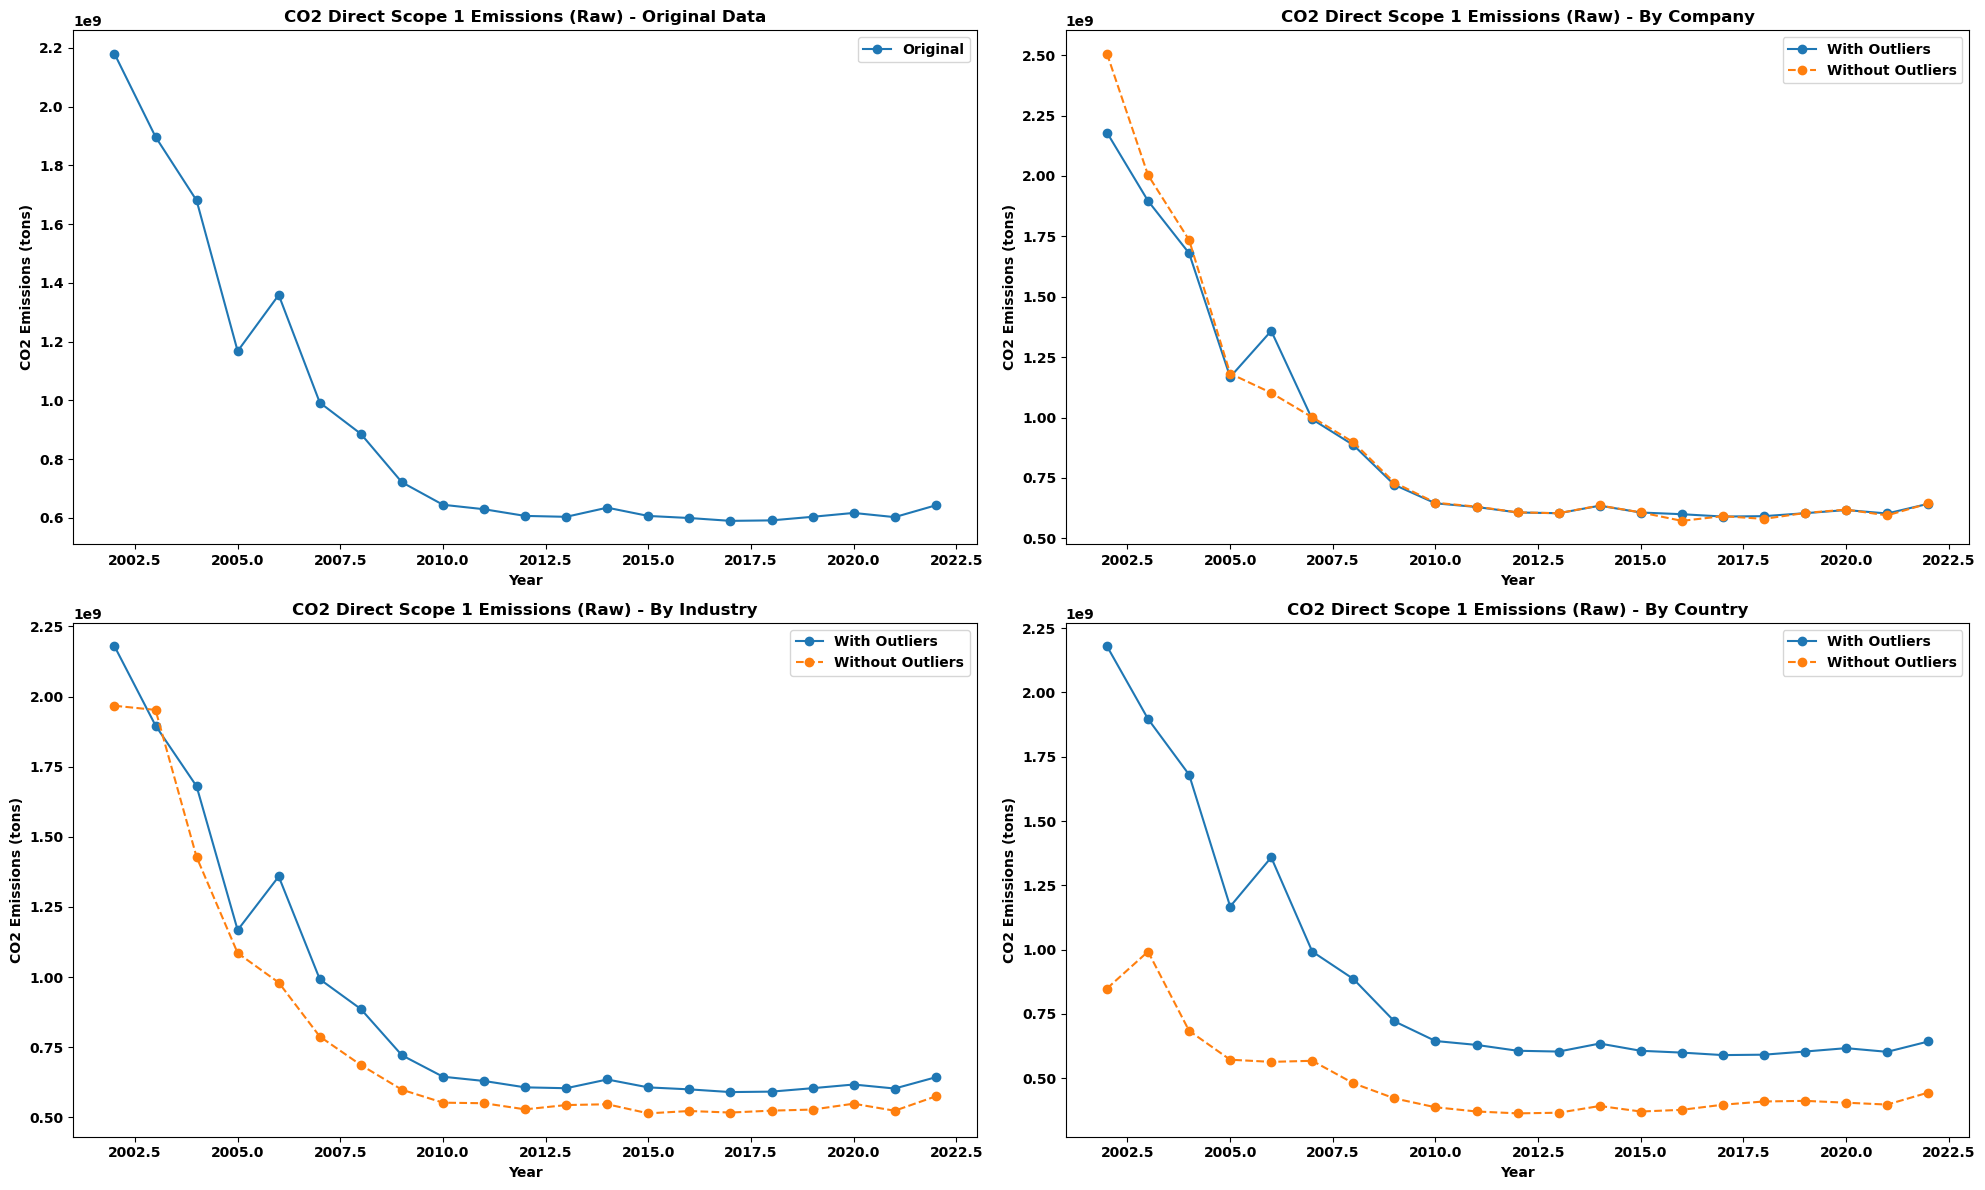

STD Method - Percentage of Outliers Removed by Company: 0.67%
STD Method - Percentage of Outliers Removed by Industry: 3.69%
STD Method - Percentage of Outliers Removed by Country: 3.63%
STD Method - Number of rows Removed by Company: 123
STD Method - By Company Removed rows:


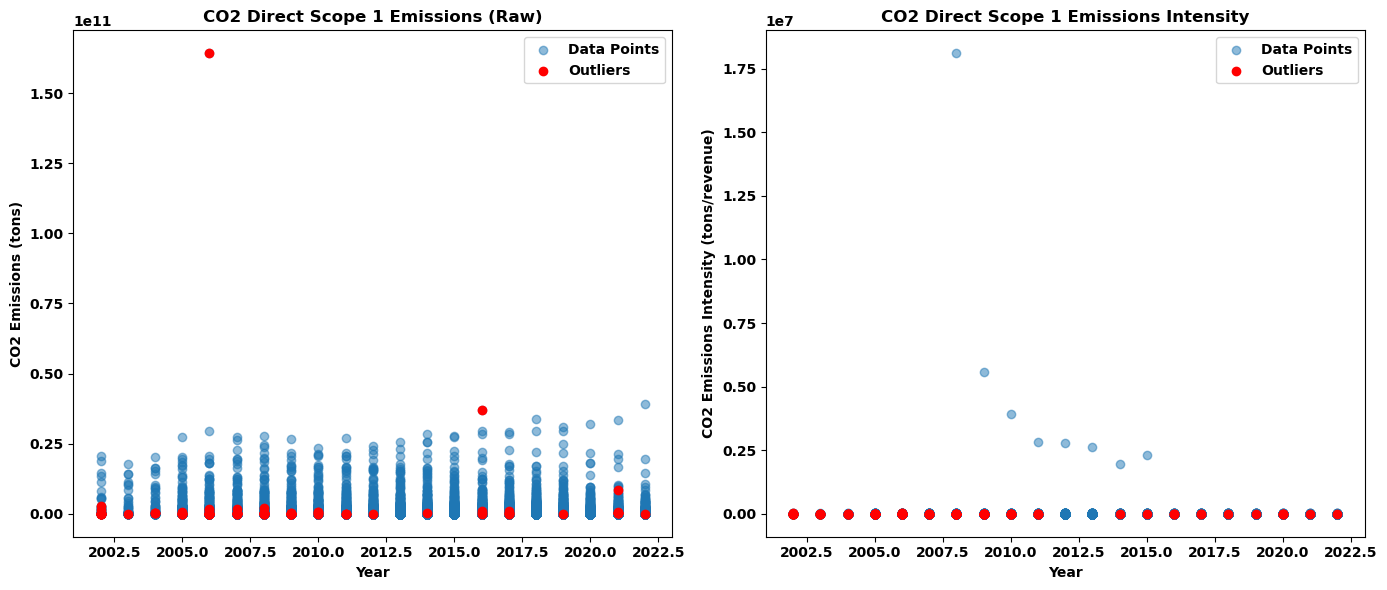

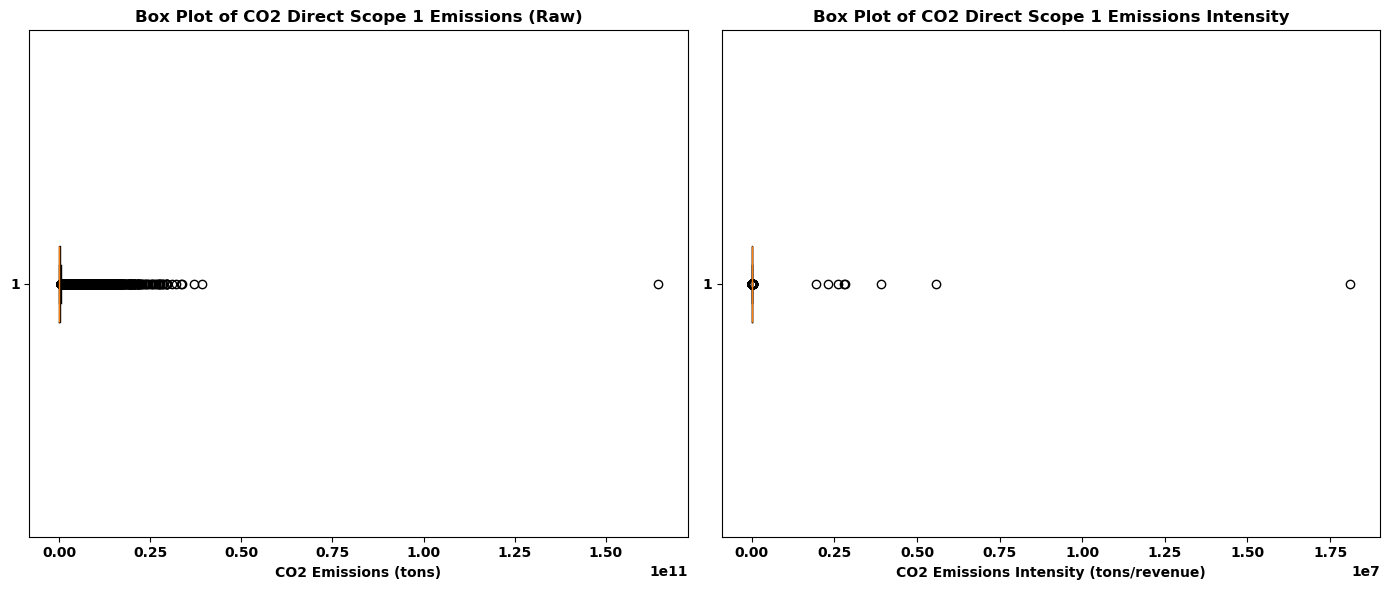

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to identify outliers using standard deviation method with updated threshold
def find_outliers_std(df, column, threshold=outlier_threshold):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] > mean + threshold * std) | (df[column] < mean - threshold * std)]
    return outliers

# Identify outliers by company
outliers_by_company_raw_std = data.groupby('clarity_id').apply(lambda x: find_outliers_std(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_company_intensity_std = data.groupby('clarity_id').apply(lambda x: find_outliers_std(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Identify outliers by industry
outliers_by_industry_raw_std = data.groupby('clarity_industry_code').apply(lambda x: find_outliers_std(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_industry_intensity_std = data.groupby('clarity_industry_code').apply(lambda x: find_outliers_std(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Identify outliers by country
outliers_by_country_raw_std = data.groupby('country_code').apply(lambda x: find_outliers_std(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_country_intensity_std = data.groupby('country_code').apply(lambda x: find_outliers_std(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Combine and remove duplicates for each method
outliers_by_company_std = pd.concat([outliers_by_company_raw_std, outliers_by_company_intensity_std]).drop_duplicates()
outliers_by_industry_std = pd.concat([outliers_by_industry_raw_std, outliers_by_industry_intensity_std]).drop_duplicates()
outliers_by_country_std = pd.concat([outliers_by_country_raw_std, outliers_by_country_intensity_std]).drop_duplicates()

# Calculate the percentage of outliers removed for each method
total_points = len(data)
percentage_outliers_by_company_std = (len(outliers_by_company_std) / total_points) * 100
percentage_outliers_by_industry_std = (len(outliers_by_industry_std) / total_points) * 100
percentage_outliers_by_country_std = (len(outliers_by_country_std) / total_points) * 100

# Remove outliers from the original dataset for each method
data_no_outliers_by_company_std = data[~data.apply(tuple, axis=1).isin(outliers_by_company_std.apply(tuple, axis=1))]
data_no_outliers_by_industry_std = data[~data.apply(tuple, axis=1).isin(outliers_by_industry_std.apply(tuple, axis=1))]
data_no_outliers_by_country_std = data[~data.apply(tuple, axis=1).isin(outliers_by_country_std.apply(tuple, axis=1))]


# Visualization
plt.figure(figsize=(20, 12))

# Original data
plt.subplot(2, 2, 1)
data_grouped = data.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='Original')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - Original Data')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Company
plt.subplot(2, 2, 2)
data_grouped_no_outliers_std = data_no_outliers_by_company_std.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_std['metric_year'], data_grouped_no_outliers_std['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Company')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Industry
plt.subplot(2, 2, 3)
data_grouped_no_outliers_std = data_no_outliers_by_industry_std.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_std['metric_year'], data_grouped_no_outliers_std['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Industry')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Country
plt.subplot(2, 2, 4)
data_grouped_no_outliers_std = data_no_outliers_by_country_std.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_std['metric_year'], data_grouped_no_outliers_std['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"STD Method - Percentage of Outliers Removed by Company: {percentage_outliers_by_company_std:.2f}%")
print(f"STD Method - Percentage of Outliers Removed by Industry: {percentage_outliers_by_industry_std:.2f}%")
print(f"STD Method - Percentage of Outliers Removed by Country: {percentage_outliers_by_country_std:.2f}%")

print(f"STD Method - Number of rows Removed by Company: {outliers_by_company_std['clarity_id'].count()}")

print("STD Method - By Company Removed rows:")

outliers_by_company_std.sort_values(by='co2directscope1_raw', ascending=False)


# Calculate outlier statistics for each company
outlier_stats_raw_std = outliers_by_company_raw_std['clarity_id'].value_counts().reset_index()
outlier_stats_raw_std.columns = ['clarity_id', 'outlier_count_raw']

outlier_stats_intensity_std = outliers_by_company_intensity_std['clarity_id'].value_counts().reset_index()
outlier_stats_intensity_std.columns = ['clarity_id', 'outlier_count_intensity']

# Merge the outlier statistics
outlier_stats_std = pd.merge(outlier_stats_raw_std, outlier_stats_intensity_std, on='clarity_id', how='outer').fillna(0)

# Display the outlier statistics
outlier_stats_std.head()

# Visualization
plt.figure(figsize=(14, 6))

# Scatter plot for co2directscope1_raw
plt.subplot(1, 2, 1)
plt.scatter(data['metric_year'], data['co2directscope1_raw'], label='Data Points', alpha=0.5)
plt.scatter(outliers_by_company_raw_std['metric_year'], outliers_by_company_raw_std['co2directscope1_raw'], color='r', label='Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# Scatter plot for co2directscope1_intensity
plt.subplot(1, 2, 2)
plt.scatter(data['metric_year'], data['co2directscope1_intensity'], label='Data Points', alpha=0.5)
plt.scatter(outliers_by_company_intensity_std['metric_year'], outliers_by_company_intensity_std['co2directscope1_intensity'], color='r', label='Outliers')
plt.title('CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Intensity (tons/revenue)')
plt.legend()

plt.tight_layout()
plt.show()

# Box plot for co2directscope1_raw
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['co2directscope1_raw'], vert=False)
plt.title('Box Plot of CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('CO2 Emissions (tons)')

# Box plot for co2directscope1_intensity
plt.subplot(1, 2, 2)
plt.boxplot(data['co2directscope1_intensity'], vert=False)
plt.title('Box Plot of CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('CO2 Emissions Intensity (tons/revenue)')

plt.tight_layout()
plt.show()



# Removing Outliers by IQR

C:\Users\Marshall\AppData\Local\Temp\ipykernel_10280\4027339545.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_company_raw_iqr = data.groupby('clarity_id').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_raw')).reset_index(drop=True)
C:\Users\Marshall\AppData\Local\Temp\ipykernel_10280\4027339545.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_company_intensity_iqr =

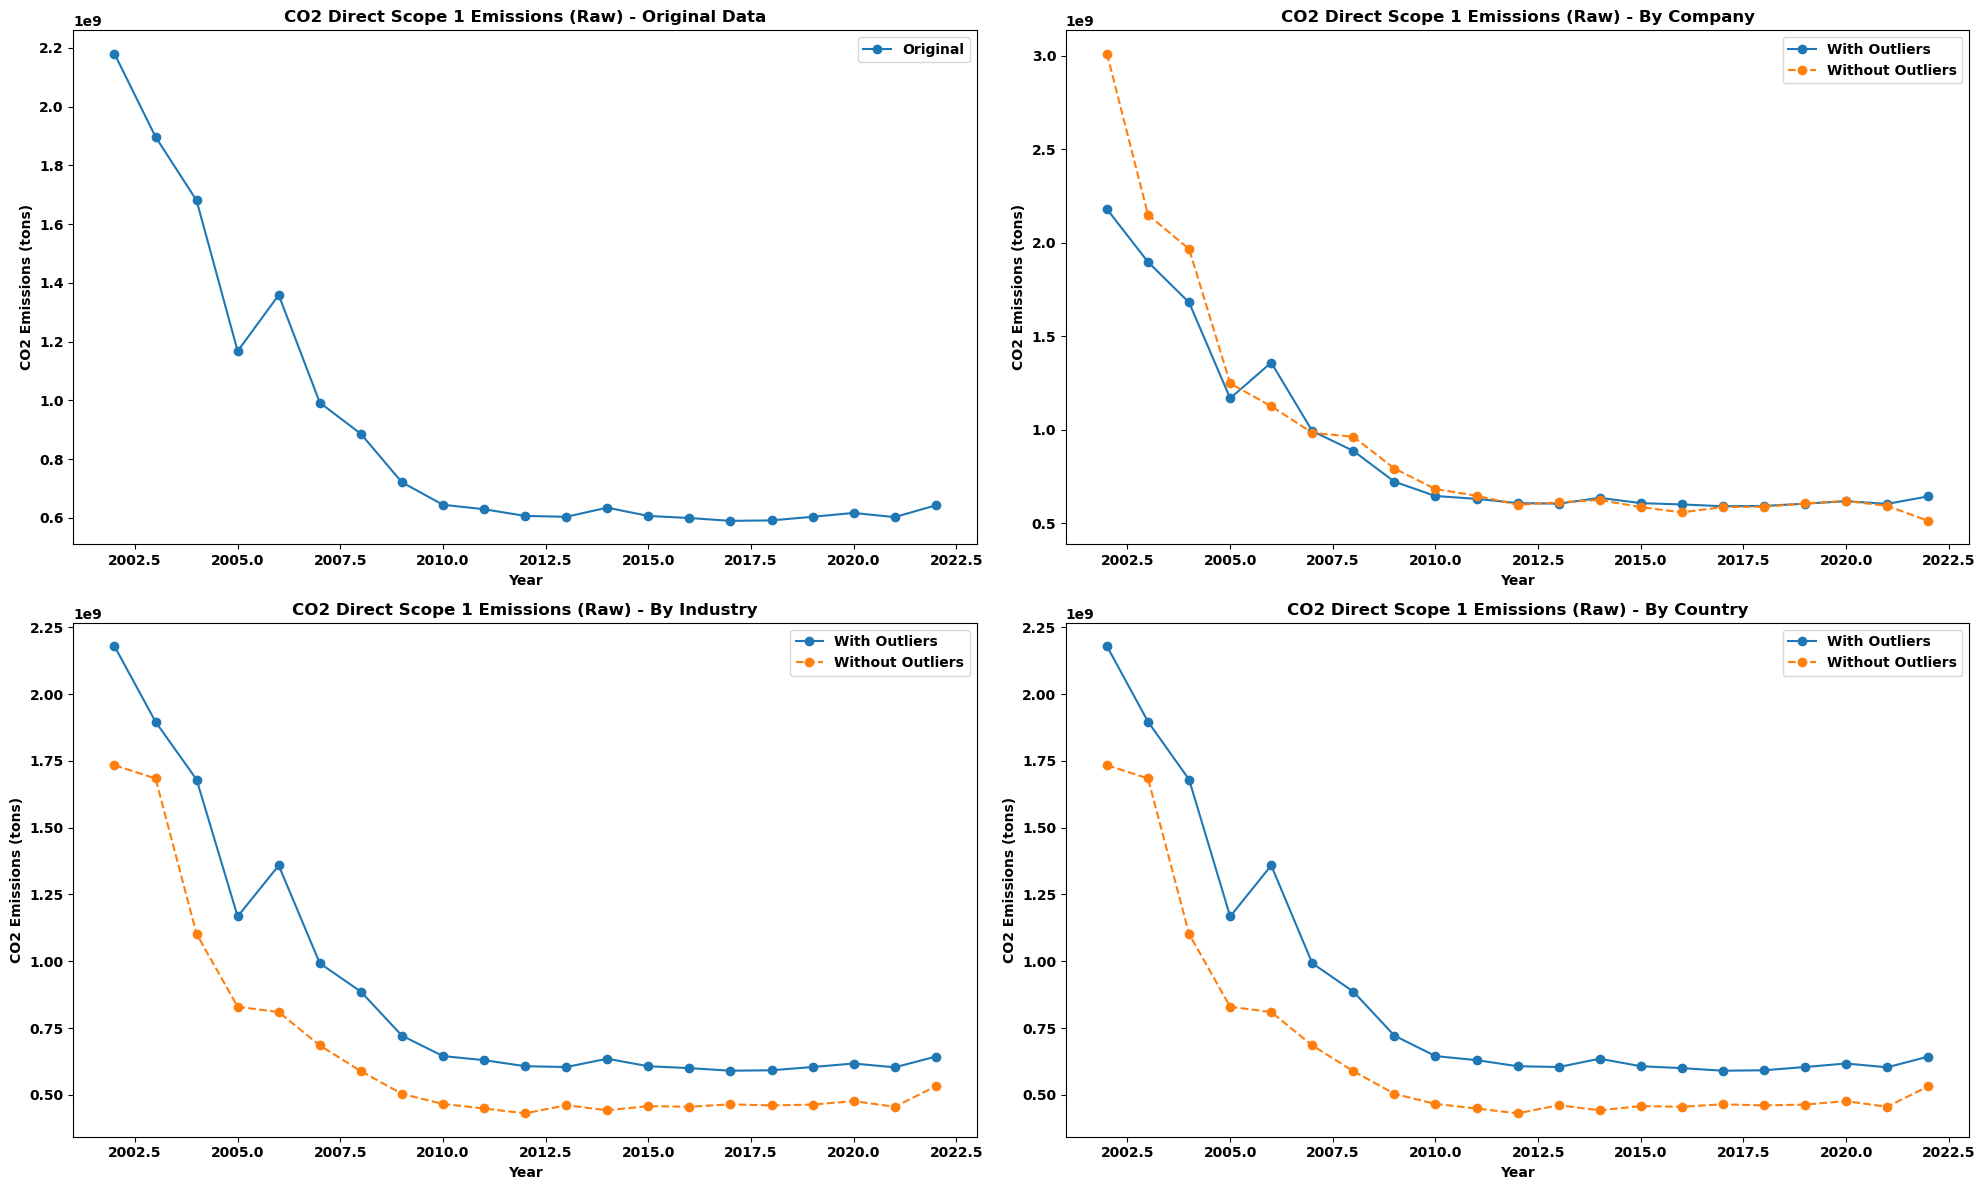

IQR Method - Percentage of Outliers Removed by Company: 8.02%
IQR Method - Percentage of Outliers Removed by Industry: 13.41%
IQR Method - Percentage of Outliers Removed by Country: 18.93%
IQR Method - Number of rows Removed by Company: 1467
IQR Method - By Company Removed rows:


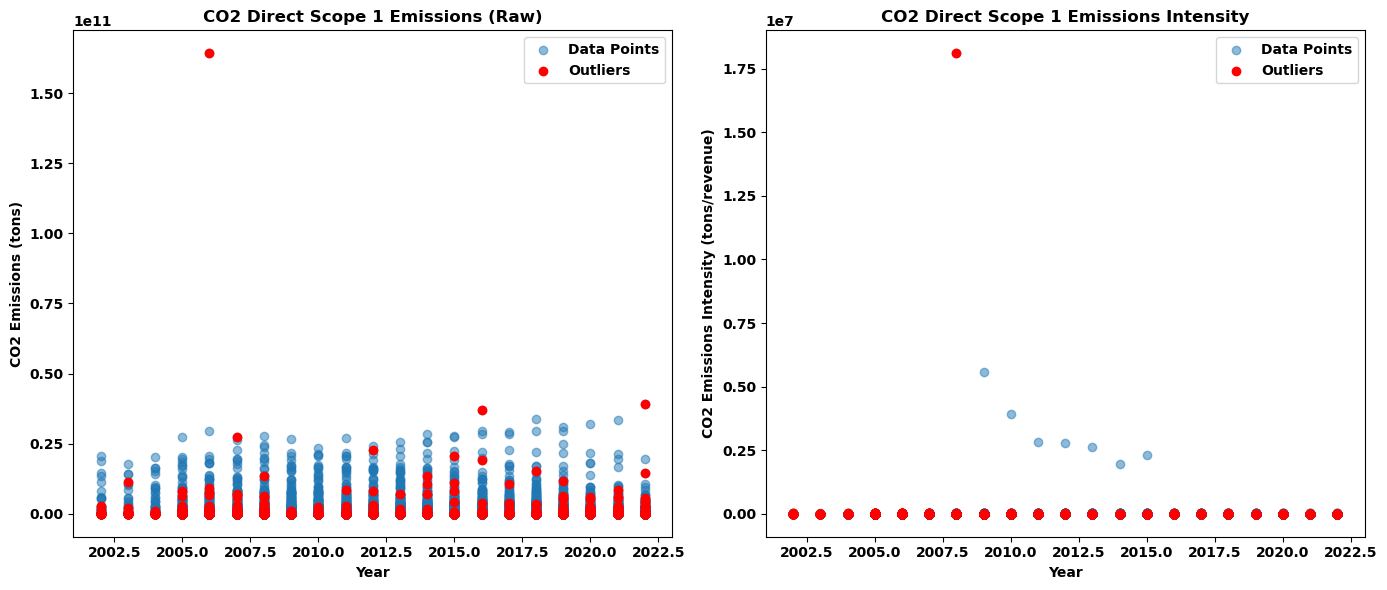

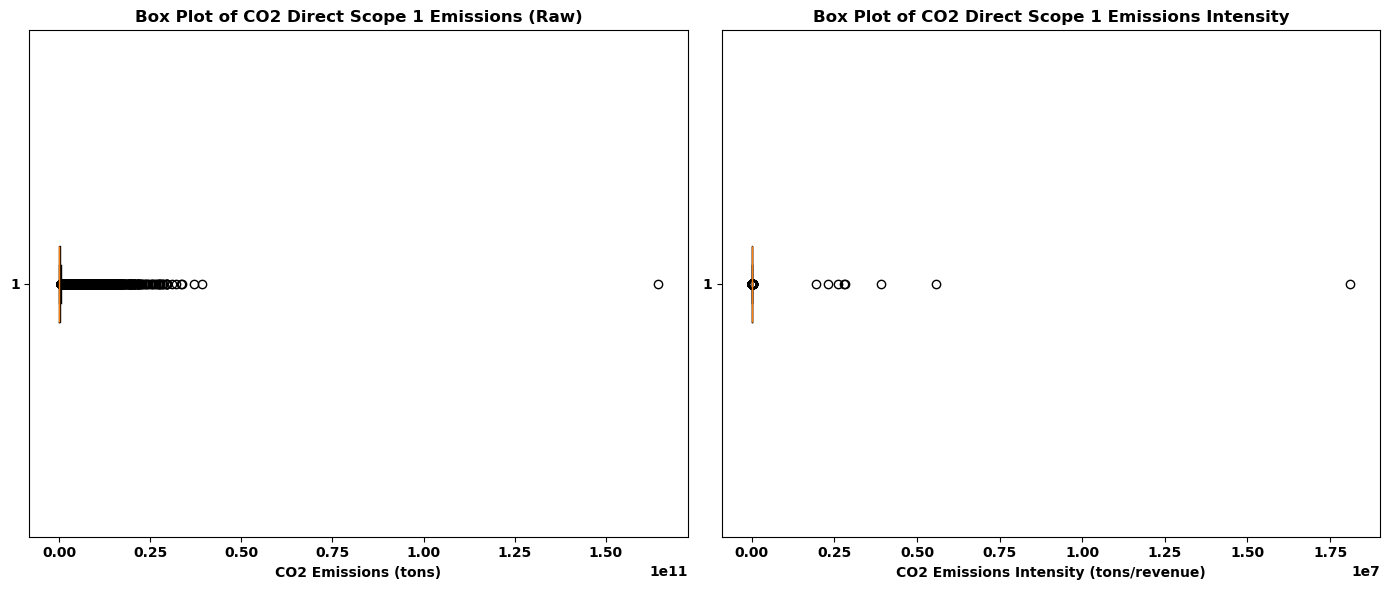

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (assumed to be loaded in DataFrame 'data')

def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers by company
outliers_by_company_raw_iqr = data.groupby('clarity_id').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_company_intensity_iqr = data.groupby('clarity_id').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Identify outliers by industry
outliers_by_industry_raw_iqr = data.groupby('clarity_industry_code').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_industry_intensity_iqr = data.groupby('clarity_industry_code').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Identify outliers by country
outliers_by_country_raw_iqr = data.groupby('country_code').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_raw')).reset_index(drop=True)
outliers_by_country_intensity_iqr = data.groupby('country_code').apply(lambda x: find_outliers_iqr(x, 'co2directscope1_intensity')).reset_index(drop=True)

# Combine and remove duplicates for each method
outliers_by_company_iqr = pd.concat([outliers_by_company_raw_iqr, outliers_by_company_intensity_iqr]).drop_duplicates()
outliers_by_industry_iqr = pd.concat([outliers_by_industry_raw_iqr, outliers_by_industry_intensity_iqr]).drop_duplicates()
outliers_by_country_iqr = pd.concat([outliers_by_country_raw_iqr, outliers_by_country_intensity_iqr]).drop_duplicates()

# Calculate the percentage of outliers removed for each method
total_points = len(data)
percentage_outliers_by_company_iqr = (len(outliers_by_company_iqr) / total_points) * 100
percentage_outliers_by_industry_iqr = (len(outliers_by_industry_iqr) / total_points) * 100
percentage_outliers_by_country_iqr = (len(outliers_by_country_iqr) / total_points) * 100

# Remove outliers from the original dataset for each method
data_no_outliers_by_company_iqr = data[~data.apply(tuple, axis=1).isin(outliers_by_company_iqr.apply(tuple, axis=1))]
data_no_outliers_by_industry_iqr = data[~data.apply(tuple, axis=1).isin(outliers_by_industry_iqr.apply(tuple, axis=1))]
data_no_outliers_by_country_iqr = data[~data.apply(tuple, axis=1).isin(outliers_by_country_iqr.apply(tuple, axis=1))]


# Visualization
plt.figure(figsize=(20, 12))

# Original data
plt.subplot(2, 2, 1)
data_grouped = data.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='Original')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - Original Data')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Company
plt.subplot(2, 2, 2)
data_grouped_no_outliers_iqr = data_no_outliers_by_company_iqr.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_iqr['metric_year'], data_grouped_no_outliers_iqr['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Company')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Industry
plt.subplot(2, 2, 3)
data_grouped_no_outliers_iqr = data_no_outliers_by_industry_iqr.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_iqr['metric_year'], data_grouped_no_outliers_iqr['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Industry')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# By Country
plt.subplot(2, 2, 4)
data_grouped_no_outlier_iqr = data_no_outliers_by_country_iqr.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped['metric_year'], data_grouped['co2directscope1_raw'], marker='o', linestyle='-', label='With Outliers')
plt.plot(data_grouped_no_outliers_iqr['metric_year'], data_grouped_no_outliers_iqr['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw) - By Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"IQR Method - Percentage of Outliers Removed by Company: {percentage_outliers_by_company_iqr:.2f}%")
print(f"IQR Method - Percentage of Outliers Removed by Industry: {percentage_outliers_by_industry_iqr:.2f}%")
print(f"IQR Method - Percentage of Outliers Removed by Country: {percentage_outliers_by_country_iqr:.2f}%")

print(f"IQR Method - Number of rows Removed by Company: {outliers_by_company_iqr['clarity_id'].count()}")

print("IQR Method - By Company Removed rows:")

outliers_by_company_iqr.sort_values(by='co2directscope1_raw', ascending=False)


# Calculate outlier statistics for each company
outlier_stats_raw_iqr = outliers_by_company_raw_iqr['clarity_id'].value_counts().reset_index()
outlier_stats_raw_iqr.columns = ['clarity_id', 'outlier_count_raw']

outlier_stats_intensity_iqr = outliers_by_company_intensity_iqr['clarity_id'].value_counts().reset_index()
outlier_stats_intensity_iqr.columns = ['clarity_id', 'outlier_count_intensity']

# Merge the outlier statistics
outlier_stats_iqr = pd.merge(outlier_stats_raw_iqr, outlier_stats_intensity_iqr, on='clarity_id', how='outer').fillna(0)

# Display the outlier statistics
outlier_stats_iqr.head()

# Visualization
plt.figure(figsize=(14, 6))

# Scatter plot for co2directscope1_raw
plt.subplot(1, 2, 1)
plt.scatter(data['metric_year'], data['co2directscope1_raw'], label='Data Points', alpha=0.5)
plt.scatter(outliers_by_company_raw_iqr['metric_year'], outliers_by_company_raw_iqr['co2directscope1_raw'], color='r', label='Outliers')
plt.title('CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# Scatter plot for co2directscope1_intensity
plt.subplot(1, 2, 2)
plt.scatter(data['metric_year'], data['co2directscope1_intensity'], label='Data Points', alpha=0.5)
plt.scatter(outliers_by_company_intensity_iqr['metric_year'], outliers_by_company_intensity_iqr['co2directscope1_intensity'], color='r', label='Outliers')
plt.title('CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Intensity (tons/revenue)')
plt.legend()

plt.tight_layout()
plt.show()

# Box plot for co2directscope1_raw
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['co2directscope1_raw'], vert=False)
plt.title('Box Plot of CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('CO2 Emissions (tons)')

# Box plot for co2directscope1_intensity
plt.subplot(1, 2, 2)
plt.boxplot(data['co2directscope1_intensity'], vert=False)
plt.title('Box Plot of CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('CO2 Emissions Intensity (tons/revenue)')

plt.tight_layout()
plt.show()



## By Company Graph

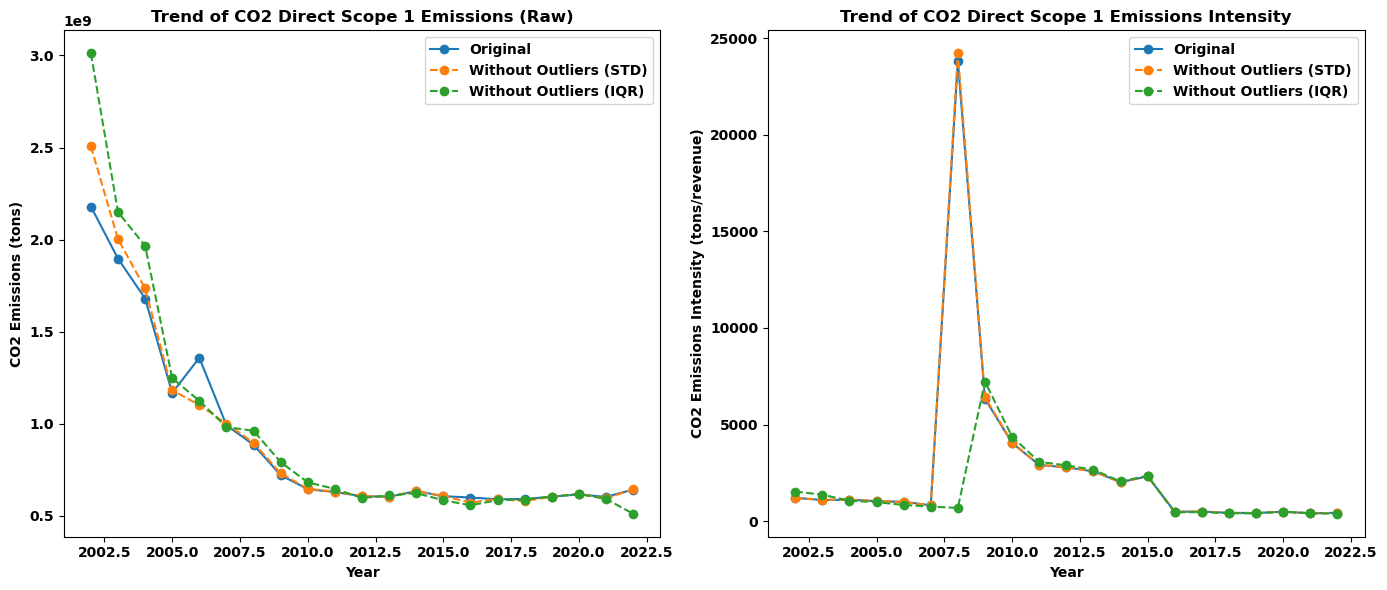

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))

# Trend of CO2 Direct Scope 1 Emissions (Raw) with and without outliers
plt.subplot(1, 2, 1)
data_grouped_raw = data.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped_raw['metric_year'], data_grouped_raw['co2directscope1_raw'], marker='o', linestyle='-', label='Original')

data_grouped_raw_no_outliers_std = data_no_outliers_by_company_std.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped_raw_no_outliers_std['metric_year'], data_grouped_raw_no_outliers_std['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers (STD)')

data_grouped_raw_no_outliers_iqr = data_no_outliers_by_company_iqr.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()
plt.plot(data_grouped_raw_no_outliers_iqr['metric_year'], data_grouped_raw_no_outliers_iqr['co2directscope1_raw'], marker='o', linestyle='--', label='Without Outliers (IQR)')

plt.title('Trend of CO2 Direct Scope 1 Emissions (Raw)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.legend()

# Trend of CO2 Direct Scope 1 Emissions Intensity with and without outliers
plt.subplot(1, 2, 2)
data_grouped_intensity = data.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()
plt.plot(data_grouped_intensity['metric_year'], data_grouped_intensity['co2directscope1_intensity'], marker='o', linestyle='-', label='Original')

data_grouped_intensity_no_outliers_std = data_no_outliers_by_company_std.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()
plt.plot(data_grouped_intensity_no_outliers_std['metric_year'], data_grouped_intensity_no_outliers_std['co2directscope1_intensity'], marker='o', linestyle='--', label='Without Outliers (STD)')

data_grouped_intensity_no_outliers_iqr = data_no_outliers_by_company_iqr.groupby('metric_year')['co2directscope1_intensity'].mean().reset_index()
plt.plot(data_grouped_intensity_no_outliers_iqr['metric_year'], data_grouped_intensity_no_outliers_iqr['co2directscope1_intensity'], marker='o', linestyle='--', label='Without Outliers (IQR)')

plt.title('Trend of CO2 Direct Scope 1 Emissions Intensity')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Intensity (tons/revenue)')
plt.legend()

plt.tight_layout()
plt.show()


## Selecting Method (IQR or STD)

In [13]:
# Selected Method
selected_outliers_by_company = outliers_by_company_iqr

# Change to selected Method
selected_data_no_outliers_by_company = data[~data.apply(tuple, axis=1).isin(selected_outliers_by_company.apply(tuple, axis=1))]
percentage_outliers_by_company = (len(selected_outliers_by_company) / total_points) * 100
data_no_outliers_by_company = selected_data_no_outliers_by_company


print(f"Percentage of Outliers Removed by Company for Selected Method: {percentage_outliers_by_company:.2f}%")
print(f"Number of rows Removed by Company: {outliers_by_company_iqr['clarity_id'].count()} out of {data['clarity_id'].count()}")
print(f"Remaining: {data_no_outliers_by_company['clarity_id'].count()}")


Percentage of Outliers Removed by Company for Selected Method: 8.02%
Number of rows Removed by Company: 1467 out of 18283
Remaining: 16816


## Handling Missing Data

In [15]:
import pandas as pd

# List of all possible years in the dataset
all_years = data_no_outliers_by_company['metric_year'].unique()
all_years.sort()

# Function to add missing years for each company
def add_missing_years(df, all_years):
    companies = df['clarity_id'].unique()
    filled_data = []

    for company in companies:
        company_data = df[df['clarity_id'] == company]
        company_years = company_data['metric_year'].unique()
        missing_years = set(all_years) - set(company_years)
        
        missing_rows = pd.DataFrame({
            'clarity_id': [company] * len(missing_years),
            'metric_year': list(missing_years)
        })
        missing_rows = missing_rows.reindex(columns=df.columns, fill_value=None)
        
        company_data = pd.concat([company_data, missing_rows], ignore_index=True)
        filled_data.append(company_data)
    
    filled_data = pd.concat(filled_data, ignore_index=True)
    return filled_data

# Add missing years
data_filled_years = add_missing_years(data_no_outliers_by_company, all_years)

In [16]:
# Company to Verify
company_id_to_verify = '01FF543RRCCWNHSF9RQKZQV785'

# Verify the specific company
specific_company_data = data_filled_years[data_filled_years['clarity_id'] == company_id_to_verify]
specific_company_data_sorted = specific_company_data.sort_values(by='metric_year').reset_index(drop=True)
print(specific_company_data_sorted[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']])


                    clarity_id  metric_year  co2directscope1_raw       revenue
0   01FF543RRCCWNHSF9RQKZQV785       2002.0                  NaN           NaN
1   01FF543RRCCWNHSF9RQKZQV785       2003.0                  NaN           NaN
2   01FF543RRCCWNHSF9RQKZQV785       2004.0         7.584743e+09  7.770729e+06
3   01FF543RRCCWNHSF9RQKZQV785       2005.0         7.758519e+09  9.960087e+06
4   01FF543RRCCWNHSF9RQKZQV785       2006.0                  NaN           NaN
5   01FF543RRCCWNHSF9RQKZQV785       2007.0         8.460399e+09  1.178282e+07
6   01FF543RRCCWNHSF9RQKZQV785       2008.0         7.764080e+09  1.460402e+07
7   01FF543RRCCWNHSF9RQKZQV785       2009.0         8.835599e+09  1.123875e+07
8   01FF543RRCCWNHSF9RQKZQV785       2010.0         7.596493e+09  1.330428e+07
9   01FF543RRCCWNHSF9RQKZQV785       2011.0         6.398741e+09  1.454217e+07
10  01FF543RRCCWNHSF9RQKZQV785       2012.0         6.573382e+09  1.716446e+07
11  01FF543RRCCWNHSF9RQKZQV785       2013.0         

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# List of all possible years in the dataset
all_years = data_no_outliers_by_company['metric_year'].unique()
all_years.sort()

# Function to add missing years for each company
def add_missing_years(df, all_years):
    companies = df['clarity_id'].unique()
    filled_data = []

    for company in companies:
        company_data = df[df['clarity_id'] == company]
        company_years = company_data['metric_year'].unique()
        missing_years = set(all_years) - set(company_years)
        
        missing_rows = pd.DataFrame({
            'clarity_id': [company] * len(missing_years),
            'metric_year': list(missing_years)
        })
        missing_rows = missing_rows.reindex(columns=df.columns, fill_value=None)
        
        company_data = pd.concat([company_data, missing_rows], ignore_index=True)
        filled_data.append(company_data)
    
    filled_data = pd.concat(filled_data, ignore_index=True)
    return filled_data

# Add missing years
data_filled_years = add_missing_years(data_no_outliers_by_company, all_years)

# Define columns for imputation
columns_to_impute = ['co2directscope1_raw', 'revenue', 'co2directscope1_intensity']

# Handle categorical columns
categorical_columns = ['metric', 'provider_code', 'clarity_industry_code', 'clarity_industry_name', 'country_code']

# Function to handle remaining missing values for categorical columns
def fill_categorical(df, columns):
    for column in columns:
        mode_by_clarity = df.groupby('clarity_id')[column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        df[column] = df.apply(lambda row: mode_by_clarity[row['clarity_id']] if pd.isnull(row[column]) else row[column], axis=1)
    return df


# Apply different methods for handling missing data

# 1. Dropping rows with missing values
data_dropped = data_filled_years.dropna()

# 2. Filling missing values with mean
data_filled_mean = data_filled_years.copy()
for column in columns_to_impute:
    data_filled_mean[column] = data_filled_mean.groupby('clarity_id')[column].transform(lambda x: x.fillna(x.mean()))
data_filled_mean = fill_categorical(data_filled_mean, categorical_columns)

# 3. Filling missing values with median
data_filled_median = data_filled_years.copy()
for column in columns_to_impute:
    data_filled_median[column] = data_filled_median.groupby('clarity_id')[column].transform(lambda x: x.fillna(x.median()))
data_filled_median = fill_categorical(data_filled_median, categorical_columns)

# 4. Forward fill
data_filled_ffill = data_filled_years.copy()
data_filled_ffill = data_filled_ffill.sort_values(by=['clarity_id', 'metric_year'])
for column in columns_to_impute:
    data_filled_ffill[column] = data_filled_ffill.groupby('clarity_id')[column].apply(lambda group: group.ffill())
data_filled_ffill = fill_categorical(data_filled_ffill, categorical_columns)

# 5. Backward fill
data_filled_bfill = data_filled_years.copy()
data_filled_bfill = data_filled_bfill.sort_values(by=['clarity_id', 'metric_year'])
for column in columns_to_impute:
    data_filled_bfill[column] = data_filled_bfill.groupby('clarity_id')[column].apply(lambda group: group.bfill())
data_filled_bfill = fill_categorical(data_filled_bfill, categorical_columns)

# Function to plot trend graphs for all companies combined
def plot_trend_graphs(df_dict, column, title, ylabel):
    plt.figure(figsize=(14, 8))
    
    for method_name, df in df_dict.items():
        aggregated_data = df.groupby('metric_year')[column].mean()
        plt.plot(aggregated_data.index, aggregated_data.values, marker='o', linestyle='-', label=method_name)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare data for plotting
methods = {
    "Original (with outliers removed)": data_filled_years,
    "Dropped": data_dropped,
    "Filled with Mean": data_filled_mean,
    "Filled with Median": data_filled_median,
    "Forward Fill": data_filled_ffill,
    "Backward Fill": data_filled_bfill
}

# Plot the trend graphs for 'co2directscope1_raw'
plot_trend_graphs(methods, 'co2directscope1_raw', 'Trend of CO2 Direct Scope 1 Emissions (Raw)', 'CO2 Emissions (tons)')

# Plot the trend graphs for 'co2directscope1_intensity'
plot_trend_graphs(methods, 'co2directscope1_intensity', 'Trend of CO2 Direct Scope 1 Emissions Intensity', 'CO2 Emissions Intensity (tons/revenue)')

# Verify the processed data for Forward Fill
print("Forward Fill Data Info:")
print(data_filled_ffill.info())

# Check for any remaining missing values in Forward Fill Data
missing_values_ffill = data_filled_ffill.isnull().mean()
print("Missing values after Forward Fill handling remaining missing values:")
print(missing_values_ffill)



TypeError: incompatible index of inserted column with frame index

Clearly, forward fill is the best method to use

In [ ]:
# Company to Verify
company_id_to_verify = '01FF543RRCCWNHSF9RQKZQV785'

# Verify the specific company
specific_company_data = data_filled_ffill[data_filled_ffill['clarity_id'] == company_id_to_verify]
specific_company_data_sorted = specific_company_data.sort_values(by='metric_year').reset_index(drop=True)
print(specific_company_data_sorted[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_filled_ffill is already created
# List of all possible years in the dataset
all_years = data_no_outliers_by_company['metric_year'].unique()
all_years.sort()

# Define columns for imputation
columns_to_impute = ['co2directscope1_raw', 'revenue', 'co2directscope1_intensity']

# Handle beginning missing values for each company
def handle_beginning_missing_values(df, columns):
    for company in df['clarity_id'].unique():
        company_data = df[df['clarity_id'] == company]
        for column in columns:
            if company_data[column].isnull().all():
                global_mean = df[column].mean()
                df.loc[df['clarity_id'] == company, column] = global_mean
            else:
                first_valid_index = company_data[column].first_valid_index()
                if first_valid_index is not None:
                    df.loc[(df['clarity_id'] == company) & (df.index < first_valid_index), column] = company_data[column].loc[first_valid_index]
    return df

# Handle beginning missing values for Forward Fill data
data_filled_ffill_handled = handle_beginning_missing_values(data_filled_ffill.copy(), columns_to_impute)

# Apply forward fill and backward fill again to ensure all missing values are handled
data_filled_ffill_handled = data_filled_ffill_handled.sort_values(by=['clarity_id', 'metric_year'])
for column in columns_to_impute:
    data_filled_ffill_handled[column] = data_filled_ffill_handled.groupby('clarity_id')[column].apply(lambda group: group.ffill().bfill())

# Handle remaining missing values for categorical columns with mode or a placeholder
categorical_columns = ['metric', 'provider_code', 'clarity_industry_code', 'clarity_industry_name', 'country_code']
def fill_categorical(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

data_filled_ffill_handled = fill_categorical(data_filled_ffill_handled, categorical_columns)

# Function to plot trend graphs for all companies combined
def plot_trend_graphs(df_dict, column, title, ylabel):
    plt.figure(figsize=(14, 8))
    
    for method_name, df in df_dict.items():
        aggregated_data = df.groupby('metric_year')[column].mean()
        plt.plot(aggregated_data.index, aggregated_data.values, marker='o', linestyle='-', label=method_name)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare data for plotting
methods = {
    "Original (with outliers removed)": data_filled_ffill,  # Original forward-filled data
    "Forward Fill Handled": data_filled_ffill_handled  # New handled data
}

# Plot the trend graphs for 'co2directscope1_raw'
plot_trend_graphs(methods, 'co2directscope1_raw', 'Trend of CO2 Direct Scope 1 Emissions (Raw)', 'CO2 Emissions (tons)')

# Plot the trend graphs for 'co2directscope1_intensity'
plot_trend_graphs(methods, 'co2directscope1_intensity', 'Trend of CO2 Direct Scope 1 Emissions Intensity', 'CO2 Emissions Intensity (tons/revenue)')

# Verify the processed data for Forward Fill
#print("Forward Fill Data Info After Handling Beginning Missing Values:")
#print(data_filled_ffill_handled.info())

# Check for any remaining missing values in Forward Fill Data
#missing_values_ffill_handled = data_filled_ffill_handled.isnull().mean()
#print("Missing values after handling beginning missing values and forward fill:")
#print(missing_values_ffill_handled)

# Save the processed data to a  file
data_filled_ffill_handled.to_csv('training_data_ffilled_with_outliers_std_removed.csv', index=False)


In [ ]:
# Company to Verify
company_id_to_verify = '01FF543RRCCWNHSF9RQKZQV785'

# Verify the specific company
specific_company_data = data_filled_ffill_handled[data_filled_ffill_handled['clarity_id'] == company_id_to_verify]
specific_company_data_sorted = specific_company_data.sort_values(by='metric_year').reset_index(drop=True)
print(specific_company_data_sorted[['metric_year', 'co2directscope1_raw', 'revenue']])


### Handling NAs:

- The initial data is forward filled, meaning any missing values are filled with the last observed value within each group (company). This works well for filling gaps within the data but doesn't handle periods where there is no initial value to fill from.

- For periods at the beginning with nothing to fill: 
    - Fill with Global Mean: If the entire column for a company is missing (i.e., no valid data points), it fills the missing values with the global mean of that column.
    - Fill with First Valid Value: If there are valid values later in the series, the code identifies the first valid value and backfills (propagates this value backwards) to fill the initial missing periods.

# ARIMA

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'training_data_ffilled_with_outliers_std_removed.csv'
data = pd.read_csv(file_path)

# Filter relevant columns and prepare the data
data_filtered = data[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']]
data_filtered = data_filtered.rename(columns={'metric_year': 'ds', 'co2directscope1_raw': 'y', 'revenue': 'revenue_y'})
data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

# Group by 'clarity_id'
grouped = data_filtered.groupby('clarity_id')


In [ ]:
# Function to apply ARIMA on each group
def apply_arima(group, column):
    group = group[['ds', column]].rename(columns={column: 'y'})
    group.set_index('ds', inplace=True)

    # Fit the model
    model = ARIMA(group['y'], order=(1, 1, 1))
    fit = model.fit()

    # Forecast the next 5 years
    future_dates = pd.date_range(start=group.index[-1], periods=6, freq='Y')[1:]
    yhat = fit.forecast(steps=5)
    forecast = pd.DataFrame({'ds': future_dates, 'yhat': yhat})

    # Calculate metrics
    y_true = group['y']
    y_pred = fit.predict(start=0, end=len(y_true) - 1)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    accuracy = 1 - (mae / y_true.mean())

    return forecast[['ds', 'yhat']], mse, mae, accuracy

# Apply ARIMA and store results in dictionaries
forecasts_co2 = {}
forecasts_revenue = {}
metrics_dict = {}

for name, group in grouped:
    forecast_co2, mse_co2, mae_co2, accuracy_co2 = apply_arima(group, 'y')
    forecast_revenue, mse_revenue, mae_revenue, accuracy_revenue = apply_arima(group, 'revenue_y')

    forecasts_co2[name] = forecast_co2
    forecasts_revenue[name] = forecast_revenue

    metrics_dict[name] = {
        'mse_co2': mse_co2,
        'mae_co2': mae_co2,
        'accuracy_co2': accuracy_co2,
        'mse_revenue': mse_revenue,
        'mae_revenue': mae_revenue,
        'accuracy_revenue': accuracy_revenue
    }

# Combine all forecasts and metrics into DataFrames
all_forecasts_co2 = pd.concat(forecasts_co2)
all_forecasts_revenue = pd.concat(forecasts_revenue)
metrics_df = pd.DataFrame(metrics_dict).T


In [ ]:
metrics_df.to_csv('metrics_arima.csv', index=False)


In [ ]:
# Calculate yearly mean for historical data
historical_mean_co2 = data_filtered.groupby(data_filtered['ds'].dt.year)['y'].mean()
historical_mean_revenue = data_filtered.groupby(data_filtered['ds'].dt.year)['revenue_y'].mean()

# Calculate yearly mean for forecasted data
forecast_mean_co2 = all_forecasts_co2.groupby(all_forecasts_co2['ds'].dt.year)['yhat'].mean()
forecast_mean_revenue = all_forecasts_revenue.groupby(all_forecasts_revenue['ds'].dt.year)['yhat'].mean()

# Filter forecasted data to include only years from 2023 onwards
forecast_mean_co2 = forecast_mean_co2[forecast_mean_co2.index >= 2023]
forecast_mean_revenue = forecast_mean_revenue[forecast_mean_revenue.index >= 2023]

# Combine historical and forecasted data
combined_mean_co2 = pd.concat([historical_mean_co2, forecast_mean_co2])
combined_mean_revenue = pd.concat([historical_mean_revenue, forecast_mean_revenue])


# Function to print overall and specific company metrics
def print_metrics(company_id=None):
    if company_id:
        # Print metrics for a specific company
        metrics = metrics_dict.get(company_id)
        if metrics:
            print(f"Metrics for Company ID {company_id}:")
            for metric_name, metric_value in metrics.items():
                print(f"  {metric_name}: {metric_value}")
        else:
            print(f"No metrics available for Company ID: {company_id}")
    else:
        # Calculate and print overall metrics
        overall_mse_co2 = metrics_df['mse_co2'].mean()
        overall_mae_co2 = metrics_df['mae_co2'].mean()
        overall_accuracy_co2 = metrics_df['accuracy_co2'].mean()

        overall_mse_revenue = metrics_df['mse_revenue'].mean()
        overall_mae_revenue = metrics_df['mae_revenue'].mean()
        overall_accuracy_revenue = metrics_df['accuracy_revenue'].mean()

        print("Overall Metrics for All Companies:")
        print(f"Overall MSE CO2: {overall_mse_co2}")
        print(f"Overall MAE CO2: {overall_mae_co2}")
        print(f"Overall Accuracy CO2: {overall_accuracy_co2}")
        print()
        print(f"Overall MSE Revenue: {overall_mse_revenue}")
        print(f"Overall Accuracy Revenue: {overall_accuracy_revenue}")

# Example usage for overall metrics
print_metrics()

# Plot historical and forecasted CO2 emissions mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_co2.index, combined_mean_co2, label='Mean CO2 Emissions', color='blue')
plt.axvline(x=historical_mean_co2.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Historical and Forecasted Mean CO2 Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical and forecasted revenue mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_revenue.index, combined_mean_revenue, label='Mean Revenue', color='green')
plt.axvline(x=historical_mean_revenue.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical and Forecasted Mean Revenue per Year')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to plot historical and forecasted data for a specific company
def plot_company_forecasts(company_id):
    # Retrieve forecast data
    forecast_co2 = forecasts_co2.get(company_id)
    forecast_revenue = forecasts_revenue.get(company_id)

    if forecast_co2 is None or forecast_revenue is None:
        print(f"No forecast data available for company ID: {company_id}")
        return

    # Retrieve historical data
    historical_data = data_filtered[data_filtered['clarity_id'] == company_id]

    # Retrieve metrics
    metrics = metrics_dict.get(company_id)
    if metrics:
        print(f"Metrics for Company ID {company_id}:")
        for metric_name, metric_value in metrics.items():
            print(f"  {metric_name}: {metric_value}")
    else:
        print(f"No metrics available for Company ID: {company_id}")

    # Combine historical and forecasted CO2 emissions data
    combined_co2 = pd.concat([
        historical_data[['ds', 'y']].rename(columns={'y': 'value'}),
        forecast_co2.rename(columns={'yhat': 'value'})
    ])

    # Combine historical and forecasted revenue data
    combined_revenue = pd.concat([
        historical_data[['ds', 'revenue_y']].rename(columns={'revenue_y': 'value'}),
        forecast_revenue.rename(columns={'yhat': 'value'})
    ])

    # Plot historical and forecasted CO2 emissions
    plt.figure(figsize=(12, 6))
    plt.plot(combined_co2['ds'], combined_co2['value'], label='CO2 Emissions', color='blue')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.title(f'Historical and Forecasted CO2 Emissions for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot historical and forecasted revenue
    plt.figure(figsize=(12, 6))
    plt.plot(combined_revenue['ds'], combined_revenue['value'], label='Revenue', color='green')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Historical and Forecasted Revenue for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage for specific company metrics
company_id = '01FF543RDSJ38V7QW07J4M7ZAG'  # Replace with the specific company ID
#print_metrics(company_id)
plot_company_forecasts(company_id)



# XGBoost

In [ ]:
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for clarity

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
file_path = 'training_data_ffilled_with_outliers_std_removed.csv'
data = pd.read_csv(file_path)

# Filter relevant columns and prepare the data
data_filtered = data[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']]
data_filtered = data_filtered.rename(columns={'metric_year': 'ds', 'co2directscope1_raw': 'y', 'revenue': 'revenue_y'})
data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

# Group by 'clarity_id'
grouped = data_filtered.groupby('clarity_id')


In [ ]:
import xgboost as xgb
import numpy as np

# Function to apply XGBoost on each group
def apply_xgboost(group, column):
    group = group[['ds', column]].rename(columns={column: 'y'})
    group.set_index('ds', inplace=True)
    
    # Prepare data for XGBoost
    X = np.array((group.index - group.index[0]).days).reshape(-1, 1)
    y = group['y'].values
    
    # Split into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Fit the model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    # Forecast the next 5 years (assuming 365 days per year)
    future_days = np.array([(group.index[-1] - group.index[0]).days + i * 365 for i in range(1, 6)]).reshape(-1, 1)
    yhat = model.predict(future_days)
    
    future_dates = pd.date_range(start=group.index[-1], periods=6, freq='Y')[1:]
    forecast = pd.DataFrame({'ds': future_dates, 'yhat': yhat})
    
    # Calculate metrics
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = 1 - (mae / y_test.mean())
    
    return forecast[['ds', 'yhat']], mse, mae, accuracy

# Apply XGBoost and store results in dictionaries
forecasts_co2 = {}
forecasts_revenue = {}
metrics_dict = {}

for name, group in grouped:
    forecast_co2, mse_co2, mae_co2, accuracy_co2 = apply_xgboost(group, 'y')
    forecast_revenue, mse_revenue, mae_revenue, accuracy_revenue = apply_xgboost(group, 'revenue_y')
    
    forecasts_co2[name] = forecast_co2
    forecasts_revenue[name] = forecast_revenue
    
    metrics_dict[name] = {
        'mse_co2': mse_co2,
        'mae_co2': mae_co2,
        'accuracy_co2': accuracy_co2,
        'mse_revenue': mse_revenue,
        'mae_revenue': mae_revenue,
        'accuracy_revenue': accuracy_revenue
    }

# Combine all forecasts and metrics into DataFrames
all_forecasts_co2 = pd.concat(forecasts_co2)
all_forecasts_revenue = pd.concat(forecasts_revenue)
metrics_df = pd.DataFrame(metrics_dict).T




In [ ]:
metrics_df.to_csv('metrics_xgboost.csv', index=False)

In [ ]:
# Calculate yearly mean for historical data
historical_mean_co2 = data_filtered.groupby(data_filtered['ds'].dt.year)['y'].mean()
historical_mean_revenue = data_filtered.groupby(data_filtered['ds'].dt.year)['revenue_y'].mean()

# Calculate yearly mean for forecasted data
forecast_mean_co2 = all_forecasts_co2.groupby(all_forecasts_co2['ds'].dt.year)['yhat'].mean()
forecast_mean_revenue = all_forecasts_revenue.groupby(all_forecasts_revenue['ds'].dt.year)['yhat'].mean()

# Filter forecasted data to include only years from 2023 onwards
forecast_mean_co2 = forecast_mean_co2[forecast_mean_co2.index >= 2023]
forecast_mean_revenue = forecast_mean_revenue[forecast_mean_revenue.index >= 2023]

# Combine historical and forecasted data
combined_mean_co2 = pd.concat([historical_mean_co2, forecast_mean_co2])
combined_mean_revenue = pd.concat([historical_mean_revenue, forecast_mean_revenue])


# Calculate overall metrics
overall_mse_co2 = metrics_df['mse_co2'].mean()
overall_mae_co2 = metrics_df['mae_co2'].mean()
overall_accuracy_co2 = metrics_df['accuracy_co2'].mean()

overall_mse_revenue = metrics_df['mse_revenue'].mean()
overall_mae_revenue = metrics_df['mae_revenue'].mean()
overall_accuracy_revenue = metrics_df['accuracy_revenue'].mean()

# Print overall metrics
print("Overall Metrics for All Companies:")
print(f"Overall MSE CO2: {overall_mse_co2}")
print(f"Overall MAE CO2: {overall_mae_co2}")
print(f"Overall Accuracy CO2: {overall_accuracy_co2}")
print()
print(f"Overall MSE Revenue: {overall_mse_revenue}")
print(f"Overall MAE Revenue: {overall_mae_revenue}")
print(f"Overall Accuracy Revenue: {overall_accuracy_revenue}")


# Plot historical and forecasted CO2 emissions mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_co2.index, combined_mean_co2, label='Mean CO2 Emissions', color='blue')
plt.axvline(x=historical_mean_co2.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Historical and Forecasted Mean CO2 Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical and forecasted revenue mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_revenue.index, combined_mean_revenue, label='Mean Revenue', color='green')
plt.axvline(x=historical_mean_revenue.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical and Forecasted Mean Revenue per Year')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Function to plot historical and forecasted data for a specific company
def plot_company_forecasts(company_id):
    # Retrieve forecast data
    forecast_co2 = forecasts_co2.get(company_id)
    forecast_revenue = forecasts_revenue.get(company_id)
    
    if forecast_co2 is None or forecast_revenue is None:
        print(f"No forecast data available for company ID: {company_id}")
        return
    
    # Retrieve historical data
    historical_data = data_filtered[data_filtered['clarity_id'] == company_id]
    
    # Retrieve metrics
    metrics = metrics_dict.get(company_id)
    if metrics:
        print(f"Metrics for company ID {company_id}:")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name}: {metric_value}")
    else:
        print(f"No metrics available for company ID: {company_id}")
    
    # Combine historical and forecasted CO2 emissions data
    combined_co2 = pd.concat([
        historical_data[['ds', 'y']].rename(columns={'y': 'value'}),
        forecast_co2.rename(columns={'yhat': 'value'})
    ])
    
    # Combine historical and forecasted revenue data
    combined_revenue = pd.concat([
        historical_data[['ds', 'revenue_y']].rename(columns={'revenue_y': 'value'}),
        forecast_revenue.rename(columns={'yhat': 'value'})
    ])



    # Plot historical and forecasted CO2 emissions
    plt.figure(figsize=(12, 6))
    plt.plot(combined_co2['ds'], combined_co2['value'], label='CO2 Emissions', color='blue')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.title(f'Historical and Forecasted CO2 Emissions for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot historical and forecasted revenue
    plt.figure(figsize=(12, 6))
    plt.plot(combined_revenue['ds'], combined_revenue['value'], label='Revenue', color='green')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Historical and Forecasted Revenue for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
company_id = '01FF543V14ZQMV2P5FTZ613BNJ'  # Replace with the specific company ID
plot_company_forecasts(company_id)


# Exponential Smoothing

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
file_path = 'training_data_ffilled_with_outliers_std_removed.csv'
data = pd.read_csv(file_path)

# Filter relevant columns and prepare the data
data_filtered = data[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']]
data_filtered = data_filtered.rename(columns={'metric_year': 'ds', 'co2directscope1_raw': 'y', 'revenue': 'revenue_y'})
data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

# Group by 'clarity_id'
grouped = data_filtered.groupby('clarity_id')

# Function to apply Exponential Smoothing on each group
def apply_exponential_smoothing(group):
    # Ensure data is sorted by date
    group = group.sort_values(by='ds')
    
    # Fit the model for CO2 emissions
    model_co2 = ExponentialSmoothing(group['y'], trend='add', seasonal=None)
    fit_co2 = model_co2.fit()
    
    # Fit the model for revenue
    model_revenue = ExponentialSmoothing(group['revenue_y'], trend='add', seasonal=None)
    fit_revenue = model_revenue.fit()
    
    # Forecast the next 5 years
    forecast_co2 = fit_co2.forecast(steps=5)
    forecast_revenue = fit_revenue.forecast(steps=5)
    
    # Create DataFrames with forecasted values
    future_dates = pd.date_range(start=group['ds'].max(), periods=6, freq='Y')[1:]
    forecast_co2_df = pd.DataFrame({'ds': future_dates, 'yhat': forecast_co2})
    forecast_revenue_df = pd.DataFrame({'ds': future_dates, 'revenue_yhat': forecast_revenue})
    
    # Calculate metrics
    mse_co2 = mean_squared_error(group['y'], fit_co2.fittedvalues)
    mae_co2 = mean_absolute_error(group['y'], fit_co2.fittedvalues)
    mse_revenue = mean_squared_error(group['revenue_y'], fit_revenue.fittedvalues)
    mae_revenue = mean_absolute_error(group['revenue_y'], fit_revenue.fittedvalues)
    
    accuracy_co2 = 1 - (mae_co2 / group['y'].mean())
    accuracy_revenue = 1 - (mae_revenue / group['revenue_y'].mean())
    
    metrics = {
        'mse_co2': mse_co2,
        'mae_co2': mae_co2,
        'accuracy_co2': accuracy_co2,
        'mse_revenue': mse_revenue,
        'mae_revenue': mae_revenue,
        'accuracy_revenue': accuracy_revenue
    }
    
    return forecast_co2_df, forecast_revenue_df, metrics

# Apply Exponential Smoothing and store results in dictionaries
forecasts_co2 = {}
forecasts_revenue = {}
metrics_dict = {}

for name, group in grouped:
    forecast_co2_df, forecast_revenue_df, metrics = apply_exponential_smoothing(group)
    forecasts_co2[name] = forecast_co2_df
    forecasts_revenue[name] = forecast_revenue_df
    metrics_dict[name] = metrics

# Combine all forecasts and metrics into DataFrames
all_forecasts_co2 = pd.concat(forecasts_co2)
all_forecasts_revenue = pd.concat(forecasts_revenue)
metrics_df = pd.DataFrame(metrics_dict).T

# Calculate overall metrics
overall_metrics = {
    'overall_mse_co2': metrics_df['mse_co2'].mean(),
    'overall_mae_co2': metrics_df['mae_co2'].mean(),
    'overall_accuracy_co2': metrics_df['accuracy_co2'].mean(),
    'overall_mse_revenue': metrics_df['mse_revenue'].mean(),
    'overall_mae_revenue': metrics_df['mae_revenue'].mean(),
    'overall_accuracy_revenue': metrics_df['accuracy_revenue'].mean()
}

# Display overall metrics
overall_metrics


In [ ]:

metrics_df.to_csv('metrics_exponential_smoothing.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt

# Calculate yearly mean for historical data
historical_mean_co2 = data_filtered.groupby(data_filtered['ds'].dt.year)['y'].mean()
historical_mean_revenue = data_filtered.groupby(data_filtered['ds'].dt.year)['revenue_y'].mean()

# Calculate yearly mean for forecasted data
forecast_mean_co2 = all_forecasts_co2.groupby(all_forecasts_co2['ds'].dt.year)['yhat'].mean()
forecast_mean_revenue = all_forecasts_revenue.groupby(all_forecasts_revenue['ds'].dt.year)['revenue_yhat'].mean()

# Combine historical and forecasted data
combined_mean_co2 = pd.concat([historical_mean_co2, forecast_mean_co2])
combined_mean_revenue = pd.concat([historical_mean_revenue, forecast_mean_revenue])

# Plot historical and forecasted CO2 emissions
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_co2.index, combined_mean_co2, label='CO2 Emissions Mean', color='blue')
plt.axvline(x=historical_mean_co2.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Historical and Forecasted Mean CO2 Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical and forecasted revenue
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_revenue.index, combined_mean_revenue, label='Revenue Mean', color='green')
plt.axvline(x=historical_mean_revenue.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical and Forecasted Mean Revenue per Year')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to plot historical and forecasted data for a specific company
def plot_company_forecasts(company_id):
    # Retrieve forecast data
    forecast_co2 = forecasts_co2.get(company_id)
    forecast_revenue = forecasts_revenue.get(company_id)
    
    if forecast_co2 is None or forecast_revenue is None:
        print(f"No forecast data available for company ID: {company_id}")
        return
    
    # Retrieve historical data
    historical_data = data_filtered[data_filtered['clarity_id'] == company_id]
    
    # Retrieve metrics
    metrics = metrics_dict.get(company_id)
    if metrics:
        print(f"Metrics for company ID {company_id}:")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name}: {metric_value}")
    else:
        print(f"No metrics available for company ID: {company_id}")
    
    # Combine historical and forecasted CO2 emissions data
    combined_co2 = pd.concat([
        historical_data[['ds', 'y']].rename(columns={'y': 'value'}),
        forecast_co2.rename(columns={'yhat': 'value'})
    ])
    
    # Combine historical and forecasted revenue data
    combined_revenue = pd.concat([
        historical_data[['ds', 'revenue_y']].rename(columns={'revenue_y': 'value'}),
        forecast_revenue.rename(columns={'revenue_yhat': 'value'})
    ])
    
    # Plot historical and forecasted CO2 emissions
    plt.figure(figsize=(12, 6))
    plt.plot(combined_co2['ds'], combined_co2['value'], label='CO2 Emissions', color='blue')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.title(f'Historical and Forecasted CO2 Emissions for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot historical and forecasted revenue
    plt.figure(figsize=(12, 6))
    plt.plot(combined_revenue['ds'], combined_revenue['value'], label='Revenue', color='green')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Historical and Forecasted Revenue for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
company_id = '01FF543SQ5CBT6VKQN1VXZQ8QW'  # Replace with the specific company ID
plot_company_forecasts(company_id)


# Holt-Winters Smoothing

In [ ]:
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for clarity

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
file_path = 'training_data_ffilled_with_outliers_std_removed.csv'
data = pd.read_csv(file_path)

# Filter relevant columns and prepare the data
data_filtered = data[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']]
data_filtered = data_filtered.rename(columns={'metric_year': 'ds', 'co2directscope1_raw': 'y', 'revenue': 'revenue_y'})
data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

# Group by 'clarity_id'
grouped = data_filtered.groupby('clarity_id')


In [ ]:
# Function to apply Holt-Winters on each group
def apply_holt_winters(group, column):
    group = group[['ds', column]].rename(columns={column: 'y'})
    group.set_index('ds', inplace=True)
    
    # Fit the model
    model = ExponentialSmoothing(group['y'], trend='add', seasonal=None)
    fit = model.fit()
    
    # Forecast the next 5 years
    future_dates = pd.date_range(start=group.index[-1], periods=6, freq='Y')[1:]
    yhat = fit.forecast(steps=5)
    forecast = pd.DataFrame({'ds': future_dates, 'yhat': yhat})
    
    # Calculate metrics
    y_true = group['y']
    y_pred = fit.fittedvalues
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    accuracy = 1 - (mae / y_true.mean())
    
    return forecast[['ds', 'yhat']], mse, mae, accuracy

# Apply Holt-Winters and store results in dictionaries
forecasts_co2 = {}
forecasts_revenue = {}
metrics_dict = {}

for name, group in grouped:
    forecast_co2, mse_co2, mae_co2, accuracy_co2 = apply_holt_winters(group, 'y')
    forecast_revenue, mse_revenue, mae_revenue, accuracy_revenue = apply_holt_winters(group, 'revenue_y')
    
    forecasts_co2[name] = forecast_co2
    forecasts_revenue[name] = forecast_revenue
    
    metrics_dict[name] = {
        'mse_co2': mse_co2,
        'mae_co2': mae_co2,
        'accuracy_co2': accuracy_co2,
        'mse_revenue': mse_revenue,
        'mae_revenue': mae_revenue,
        'accuracy_revenue': accuracy_revenue
    }

# Combine all forecasts and metrics into DataFrames
all_forecasts_co2 = pd.concat(forecasts_co2)
all_forecasts_revenue = pd.concat(forecasts_revenue)
metrics_df = pd.DataFrame(metrics_dict).T



In [ ]:
metrics_df.to_csv('metrics_holt_exponential_smoothing.csv', index=False)

In [ ]:
# Calculate yearly mean for historical data
historical_mean_co2 = data_filtered.groupby(data_filtered['ds'].dt.year)['y'].mean()
historical_mean_revenue = data_filtered.groupby(data_filtered['ds'].dt.year)['revenue_y'].mean()

# Calculate yearly mean for forecasted data
forecast_mean_co2 = all_forecasts_co2.groupby(all_forecasts_co2['ds'].dt.year)['yhat'].mean()
forecast_mean_revenue = all_forecasts_revenue.groupby(all_forecasts_revenue['ds'].dt.year)['yhat'].mean()

# Filter forecasted data to include only years from 2023 onwards
forecast_mean_co2 = forecast_mean_co2[forecast_mean_co2.index >= 2023]
forecast_mean_revenue = forecast_mean_revenue[forecast_mean_revenue.index >= 2023]

# Combine historical and forecasted data
combined_mean_co2 = pd.concat([historical_mean_co2, forecast_mean_co2])
combined_mean_revenue = pd.concat([historical_mean_revenue, forecast_mean_revenue])

# Function to print overall and specific company metrics
def print_metrics(company_id=None):
    if company_id:
        # Print metrics for a specific company
        metrics = metrics_dict.get(company_id)
        if metrics:
            print(f"Metrics for Company ID {company_id}:")
            for metric_name, metric_value in metrics.items():
                print(f"  {metric_name}: {metric_value}")
        else:
            print(f"No metrics available for Company ID: {company_id}")
    else:
        # Calculate and print overall metrics
        overall_mse_co2 = metrics_df['mse_co2'].mean()
        overall_mae_co2 = metrics_df['mae_co2'].mean()
        overall_accuracy_co2 = metrics_df['accuracy_co2'].mean()

        overall_mse_revenue = metrics_df['mse_revenue'].mean()
        overall_mae_revenue = metrics_df['mae_revenue'].mean()
        overall_accuracy_revenue = metrics_df['accuracy_revenue'].mean()

        print("Overall Metrics for All Companies:")
        print(f"Overall MAE CO2: {overall_mae_co2}")
        print(f"Overall Accuracy CO2: {overall_accuracy_co2}")
        print()
        print(f"Overall MSE Revenue: {overall_mse_revenue}")
        print(f"Overall MAE Revenue: {overall_mae_revenue}")
        print(f"Overall Accuracy Revenue: {overall_accuracy_revenue}")
        
# Example usage for overall metrics
print_metrics()

# Plot historical and forecasted CO2 emissions mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_co2.index, combined_mean_co2, label='Mean CO2 Emissions', color='blue')
plt.axvline(x=historical_mean_co2.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Historical and Forecasted Mean CO2 Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical and forecasted revenue mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_revenue.index, combined_mean_revenue, label='Mean Revenue', color='green')
plt.axvline(x=historical_mean_revenue.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical and Forecasted Mean Revenue per Year')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to plot historical and forecasted data for a specific company
def plot_company_forecasts(company_id):
    # Retrieve forecast data
    forecast_co2 = forecasts_co2.get(company_id)
    forecast_revenue = forecasts_revenue.get(company_id)
    
    if forecast_co2 is None or forecast_revenue is None:
        print(f"No forecast data available for company ID: {company_id}")
        return
    
    # Retrieve historical data
    historical_data = data_filtered[data_filtered['clarity_id'] == company_id]
    
    # Retrieve metrics
    metrics = metrics_dict.get(company_id)
    if metrics:
        print(f"Metrics for Company ID {company_id}:")
        for metric_name, metric_value in metrics.items():
            print(f"  {metric_name}: {metric_value}")
    else:
        print(f"No metrics available for Company ID: {company_id}")
    
    # Combine historical and forecasted CO2 emissions data
    combined_co2 = pd.concat([
        historical_data[['ds', 'y']].rename(columns={'y': 'value'}),
        forecast_co2.rename(columns={'yhat': 'value'})
    ])
    
    # Combine historical and forecasted revenue data
    combined_revenue = pd.concat([
        historical_data[['ds', 'revenue_y']].rename(columns={'revenue_y': 'value'}),
        forecast_revenue.rename(columns={'yhat': 'value'})
    ])
    
    # Plot historical and forecasted CO2 emissions
    plt.figure(figsize=(12, 6))
    plt.plot(combined_co2['ds'], combined_co2['value'], label='CO2 Emissions', color='blue')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.title(f'Historical and Forecasted CO2 Emissions for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot historical and forecasted revenue
    plt.figure(figsize=(12, 6))
    plt.plot(combined_revenue['ds'], combined_revenue['value'], label='Revenue', color='green')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Historical and Forecasted Revenue for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()




# Example usage for specific company metrics
company_id = '01FF543RDSJ38V7QW07J4M7ZAG'  # Replace with the specific company ID
plot_company_forecasts(company_id)


# Prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
file_path = 'training_data_ffilled_with_outliers_std_removed.csv'
data = pd.read_csv(file_path)

# Filter relevant columns and prepare the data
data_filtered = data[['clarity_id', 'metric_year', 'co2directscope1_raw', 'revenue']]
data_filtered = data_filtered.rename(columns={'metric_year': 'ds', 'co2directscope1_raw': 'y', 'revenue': 'revenue_y'})
data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

# Group by 'clarity_id'
grouped = data_filtered.groupby('clarity_id')

# Function to apply Prophet on each group
def apply_prophet(group, column):
    group = group[['ds', column]].rename(columns={column: 'y'})
    model = Prophet()
    model.fit(group)
    future = model.make_future_dataframe(periods=5, freq='Y')
    forecast = model.predict(future)
    
    # Calculate metrics
    y_true = group['y']
    y_pred = model.predict(group)['yhat']
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    accuracy = 1 - (mae / y_true.mean())
    
    return forecast[['ds', 'yhat']], mse, mae, accuracy

# Apply Prophet and store results in dictionaries
forecasts_co2 = {}
forecasts_revenue = {}
metrics_dict = {}

for name, group in grouped:
    forecast_co2, mse_co2, mae_co2, accuracy_co2 = apply_prophet(group, 'y')
    forecast_revenue, mse_revenue, mae_revenue, accuracy_revenue = apply_prophet(group, 'revenue_y')
    
    forecasts_co2[name] = forecast_co2
    forecasts_revenue[name] = forecast_revenue
    
    metrics_dict[name] = {
        'mse_co2': mse_co2,
        'mae_co2': mae_co2,
        'accuracy_co2': accuracy_co2,
        'mse_revenue': mse_revenue,
        'mae_revenue': mae_revenue,
        'accuracy_revenue': accuracy_revenue
    }

# Combine all forecasts and metrics into DataFrames
all_forecasts_co2 = pd.concat(forecasts_co2)
all_forecasts_revenue = pd.concat(forecasts_revenue)
metrics_df = pd.DataFrame(metrics_dict).T

# Save forecasts and metrics to CSV files
#all_forecasts_co2.to_csv('/mnt/data/forecasts_co2.csv', index=False)
#all_forecasts_revenue.to_csv('/mnt/data/forecasts_revenue.csv', index=False)
#metrics_df.to_csv('/mnt/data/metrics.csv', index=False)


In [ ]:
# Calculate yearly mean for historical data
historical_mean_co2 = data_filtered.groupby(data_filtered['ds'].dt.year)['y'].mean()
historical_mean_revenue = data_filtered.groupby(data_filtered['ds'].dt.year)['revenue_y'].mean()

# Calculate yearly mean for forecasted data
forecast_mean_co2 = all_forecasts_co2.groupby(all_forecasts_co2['ds'].dt.year)['yhat'].mean()
forecast_mean_co2 = forecast_mean_co2[forecast_mean_co2.index >= 2023]
forecast_mean_revenue = all_forecasts_revenue.groupby(all_forecasts_revenue['ds'].dt.year)['yhat'].mean()
forecast_mean_revenue = forecast_mean_revenue[forecast_mean_revenue.index >= 2023]


# Combine historical and forecasted data
combined_mean_co2 = pd.concat([historical_mean_co2, forecast_mean_co2])
combined_mean_revenue = pd.concat([historical_mean_revenue, forecast_mean_revenue])

# Plot historical and forecasted CO2 emissions mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_co2.index, combined_mean_co2, label='Mean CO2 Emissions', color='blue')
plt.axvline(x=historical_mean_co2.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Historical and Forecasted Mean CO2 Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical and forecasted revenue mean
plt.figure(figsize=(12, 6))
plt.plot(combined_mean_revenue.index, combined_mean_revenue, label='Mean Revenue', color='green')
plt.axvline(x=historical_mean_revenue.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical and Forecasted Mean Revenue per Year')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
metrics_df.to_csv('metrics_prophet.csv', index=False)


In [ ]:
def print_overall_metrics():
    overall_mse_co2 = metrics_df['mse_co2'].mean()
    overall_mae_co2 = metrics_df['mae_co2'].mean()
    overall_accuracy_co2 = metrics_df['accuracy_co2'].mean()

    overall_mse_revenue = metrics_df['mse_revenue'].mean()
    overall_mae_revenue = metrics_df['mae_revenue'].mean()
    overall_accuracy_revenue = metrics_df['accuracy_revenue'].mean()

    print("Overall Metrics for All Companies:")
    print(f"Overall MSE CO2: {overall_mse_co2}")
    print(f"Overall MAE CO2: {overall_mae_co2}")
    print(f"Overall Accuracy CO2: {overall_accuracy_co2}")
    print()
    print(f"Overall MSE Revenue: {overall_mse_revenue}")
    print(f"Overall MAE Revenue: {overall_mae_revenue}")
    print(f"Overall Accuracy Revenue: {overall_accuracy_revenue}")

# Example usage
print_overall_metrics()

In [ ]:
# Function to plot historical and forecasted data for a specific company
def plot_company_forecasts(company_id):
    # Retrieve forecast data

    forecast_co2 = forecasts_co2.get(company_id)
    forecast_revenue = forecasts_revenue.get(company_id)
    forecast_co2 = forecast_co2[forecast_co2['ds'] >= '2023-01-01']
    forecast_revenue = forecast_revenue[forecast_revenue['ds'] >= '2023-01-01']


    print(forecast_co2)
    
    if forecast_co2 is None or forecast_revenue is None:
        print(f"No forecast data available for company ID: {company_id}")
        return
    
    # Retrieve historical data
    historical_data = data_filtered[data_filtered['clarity_id'] == company_id]
    
    # Retrieve metrics
    metrics = metrics_dict.get(company_id)
    if metrics:
        print(f"Metrics for company ID {company_id}:")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name}: {metric_value}")
    else:
        print(f"No metrics available for company ID: {company_id}")
    
    # Combine historical and forecasted CO2 emissions data
    combined_co2 = pd.concat([
        historical_data[['ds', 'y']].rename(columns={'y': 'value'}),
        forecast_co2.rename(columns={'yhat': 'value'})
    ])
    
    # Combine historical and forecasted revenue data
    combined_revenue = pd.concat([
        historical_data[['ds', 'revenue_y']].rename(columns={'revenue_y': 'value'}),
        forecast_revenue.rename(columns={'yhat': 'value'})
    ])
    
    # Plot historical and forecasted CO2 emissions
    plt.figure(figsize=(12, 6))
    plt.plot(combined_co2['ds'], combined_co2['value'], label='CO2 Emissions', color='blue')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.title(f'Historical and Forecasted CO2 Emissions for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot historical and forecasted revenue
    plt.figure(figsize=(12, 6))
    plt.plot(combined_revenue['ds'], combined_revenue['value'], label='Revenue', color='green')
    plt.axvline(x=historical_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Historical and Forecasted Revenue for Company ID {company_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
company_id = '01FF543SKBTJ719D5Y9CSCZGTG'  # Replace with the specific company ID
plot_company_forecasts(company_id)


# Comparison of all models

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metrics for each model
metrics_prophet = pd.read_csv('metrics_prophet.csv')
metrics_arima = pd.read_csv('metrics_arima.csv')
metrics_holt_winters = pd.read_csv('metrics_holt_exponential_smoothing.csv')
metrics_exp_smoothing = pd.read_csv('metrics_exponential_smoothing.csv')
metrics_xgboost = pd.read_csv('metrics_xgboost.csv')

# Add a column to identify the model
metrics_prophet['model'] = 'Prophet'
metrics_arima['model'] = 'ARIMA'
metrics_holt_winters['model'] = 'Holt-Winters'
metrics_exp_smoothing['model'] = 'Exponential Smoothing'
metrics_xgboost['model'] = 'XGBoost'

# Combine the metrics into a single DataFrame
metrics_combined = pd.concat([metrics_prophet,metrics_arima, metrics_holt_winters, metrics_exp_smoothing, metrics_xgboost])


In [ ]:
# Check for missing values and fill with default values if necessary
metrics_combined['mse_co2'].fillna(0, inplace=True)
metrics_combined['mae_co2'].fillna(0, inplace=True)
metrics_combined['accuracy_co2'].fillna(0, inplace=True)


# Set a style for the plots
sns.set(style="whitegrid")

# Plotting the results
plt.figure(figsize=(18, 6))

# Define colors for the plots
colors = sns.color_palette("Set2", 5)

# Plot overall MSE for each model
plt.subplot(1, 3, 1)
ax1 = metrics_combined.groupby('model')['mse_co2'].mean().plot(kind='bar', color=colors)
plt.title('Overall MSE CO2', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)

# Plot overall MAE for each model
plt.subplot(1, 3, 2)
ax2 = metrics_combined.groupby('model')['mae_co2'].mean().plot(kind='bar', color=colors)
plt.title('Overall MAE CO2', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)

# Plot overall Accuracy for each model
plt.subplot(1, 3, 3)
ax3 = metrics_combined.groupby('model')['accuracy_co2'].mean().plot(kind='bar', color=colors)
plt.title('Overall Accuracy CO2', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy should be between 0 and 1

# Add labels above the bars
for p in ax3.patches:
    ax3.annotate(format(p.get_height() * 100, '.1f') + '%',  # Multiply by 100 and format as integer percentage
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()
